# Getting started with MNIST
This tutorial will get you started with Convolutional Neural Networks in Tensorflow using the MNIST dataset.<br>
We will design a simple CNN for classification and create a workflow that includes every step from loading the dataset to building, training and visualizing the network.<br>
You can work through the notebook by running [$\blacktriangleright\!|\!$ `Run`] each code or text cell one after another. 

## Installing dependencies

In [ ]:
!pip install tensorflow matplotlib renumics-spotlight scipy

## Defining imports
We start by importing  `numpy` for scientific computing, `matplotlib` for plotting, and the machine learning framework `tensorflow`.

In [1]:
%matplotlib inline
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

## Loading the dataset
Next we load the MNIST dataset.<br>
MNIST is a database with over 60,000 images of handwritten digits. We will use the MNIST dataset to train a classifier on handwritten digits.
![](imgs/mnist.png)
*Some MNIST examples.*

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, train_labels = train_images[:6000], train_labels[:6000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

train_images = train_images.reshape(*train_images.shape, 1) / 255.0
test_images = test_images.reshape(*test_images.shape, 1) / 255.0

all_images = np.append(train_images,test_images,0)
all_labels = np.append(train_labels,test_labels,0)

We load four sets of data from the MNIST database:
- the training examples `x_train`
- the training labels `y_train`
- the test examples `x_test`
- the test labels `y_test`

We only use a subset of the whole dataset to reduce training time.

<details style="border-radius: 2px;border:1px solid #55AAAA;background:#DDEEEE;">
<summary>Click for details on the data.</summary>
    <tt>train_images</tt> has dimension <tt>6000x28x28</tt>, which means it contains 6000 training images of size <tt>28x28</tt>. Respectively, <tt>test_images</tt> contains 1000 test images of size <tt>28x28</tt>.
    We reshape the images and add a dimension of size <tt>1</tt>, which is the number of channels (would be <tt>3</tt> for colored images).<br>
    The pixels are represented as numbers between 0 and 255. We rescale them to a range between 0 and 1.<br>
<tt>train_labels</tt> and <tt>test_labels</tt> contain the training and test labels, represented as decimal numbers between 0 and 9.
</details>

Let's view an image from the training set. You can change the `sample_idx` and re-run the following cell to view some other example.

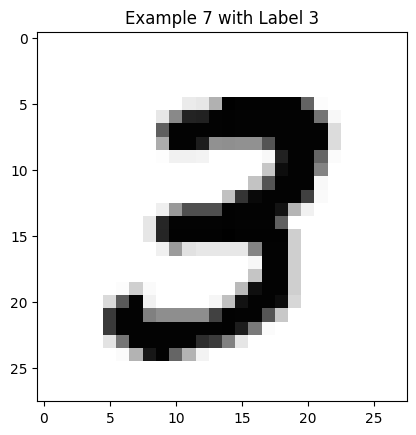

In [3]:
sample_idx = 7
sample_img = train_images[sample_idx].squeeze()
sample_label = train_labels[sample_idx]
plt.title('Example {} with Label {}'.format(sample_idx, sample_label))
plt.imshow(sample_img).set_cmap('Greys')

## Building the network
Now we get down to business: building the neural network.<br>
A CNN typically consists of multiple convolutional layers followed by pooling and some fully-connected layers, also known as dense layers, at the end.
![](imgs/cnn.png)
*A simple CNN. [Source.](https://res.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)*

In [11]:
input_img = Input((28, 28, 1))
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(input_img)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
backbone = Flatten()(x)

x = Dense(units=128, activation='relu')(backbone)
head = Dense(units=32, activation='relu')(x)
class_probs = Dense(units=10, activation='softmax')(head)

We design our network to consist of two convolutional layers which are followed by pooling layers and two dense layers at the end. The last layer has 10 outputs for our 10 digits.
<details style=\"border-radius: 2px;border:1px solid #55AAAA;background:#DDEEEE;\">
<summary>Click for details on the layers.</summary>
The <tt>Conv2D</tt> layer expects several arguments besides the input tensor. <tt>filters</tt> is the number of feature maps, <tt>kernel_size</tt> the size of the convolution kernel, <tt>padding='same'</tt> preserves the image dimensions and <tt>activation</tt> let's you define the activation function applied after the layer.<br>
The <tt>MaxPool2D</tt> layer is initialized with <tt>pool_size=2</tt>, so <tt>2x2</tt> squares of the input are aggregated to one cell with the maximum value.
</details>
<br>
Next we construct and compile our model.<br>
We use the Adam optimizer and a categorical crossentropy loss, which compares the distribution of the predictions with the true distribution.

In [12]:
model = Model(input_img, class_probs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training
Now we can start training.<br>
We iteratively fit the train images to their respective class labels and evaluate the performance of our model on the test data.
In the code cell below, `epochs` is the number of training rounds and `batch_size` is the number of examples that we collectively feed into the network.


In [13]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=16)

Epoch 1/5
375/375 [==============================] - 7s 16ms/step - loss: 0.4460 - accuracy: 0.8597 - val_loss: 0.1510 - val_accuracy: 0.9490
Epoch 2/5
375/375 [==============================] - 6s 16ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.1264 - val_accuracy: 0.9590
Epoch 3/5
375/375 [==============================] - 6s 15ms/step - loss: 0.0763 - accuracy: 0.9778 - val_loss: 0.0964 - val_accuracy: 0.9650
Epoch 4/5
375/375 [==============================] - 7s 18ms/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 5/5
375/375 [==============================] - 6s 16ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0938 - val_accuracy: 0.9680


With the default parameters we achieve a test accuracy of approximately 97% after 5 epochs. That is already pretty good. We can improve to over 99% by using more train data and/or improving the network architecture.
Feel free to try out different parameters to see how they effect the speed and accuracy of the training. You could increase or decrease the number of train examples, change some layer parameters or even add additional layers.

## Visualization
Lastly, we want to look at some of the results. We plot the first 150 test images, labeled with the predicted classes. Wrong predictions are colored red.


32/32 [==============================] - 0s 4ms/step


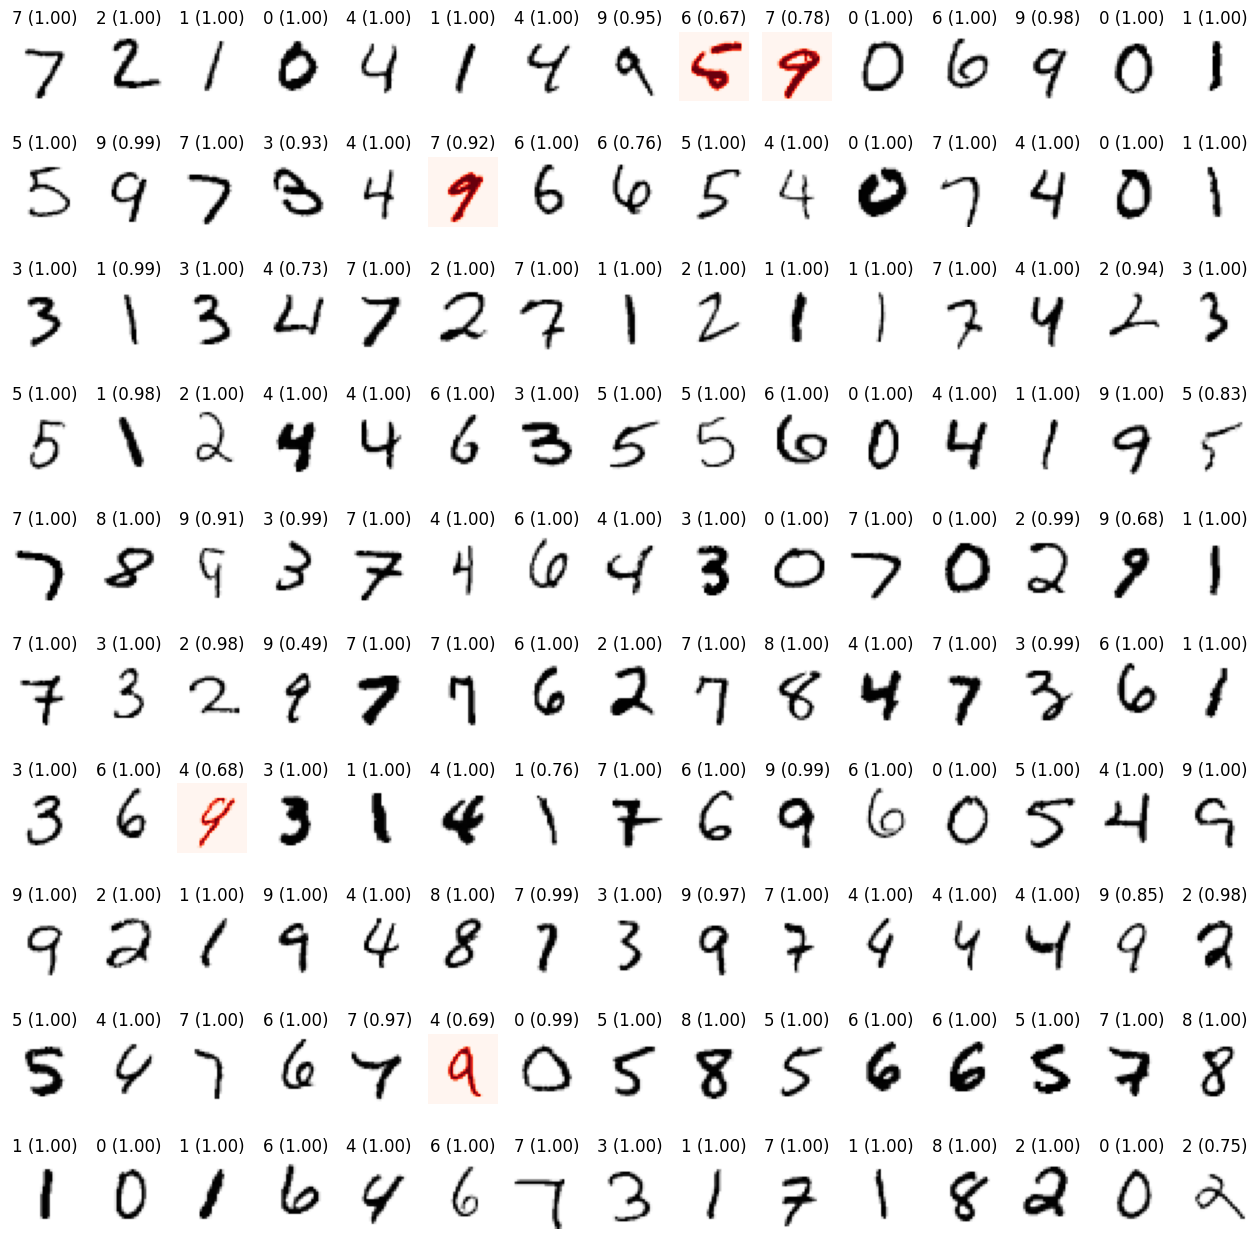

In [7]:
predictions = model.predict(test_images)
_, axs = plt.subplots(10, 15, figsize=(16, 16))
axs = axs.flatten()
for img, label, prediction, ax in zip(test_images.squeeze(), test_labels, predictions, axs):
    predicted_class = np.argmax(prediction)
    ax.axis('off')
    ax.set_title('{} ({:.2f})'.format(predicted_class, prediction[predicted_class]))
    if label == predicted_class:
        ax.imshow(img).set_cmap('Greys')
    else:
        ax.imshow(img).set_cmap('Reds')
plt.show()



Great work, you managed to build and train your first simple <tt>2D</tt> model for images.

## Qualitative analysis of the model
In order to interpret the model results, we compute several additional outputs:
- We take the output of the last CNN-layer as a similarity measure ("embedding")
- We compute the entropy of the softmax layer

In [14]:
from scipy import stats
import umap

embedding_model = Model(input_img, head)
embeddings = embedding_model.predict(all_images)
predictions_softmax = model.predict(all_images)
predictions = np.argmax(predictions_softmax, axis=1)
entropies = stats.distributions.entropy(predictions_softmax, axis=1)

#reduce embedding to two dimensions
reducer = umap.UMAP()
reduced_embedding = reducer.fit_transform(embeddings)



219/219 [==============================] - 1s 5ms/step


Put all the results in a dataframe:

In [9]:
import pandas as pd

df = pd.DataFrame(columns=['image', 'label', 'predictions', 'emb_x', 'emb_y'])

df['image'] = [ all_images[i,:,:,:] for i in range(all_images.shape[0]) ]
df['label'] = all_labels
df['prediction'] = predictions

df['emb_x'] = reduced_embedding[:,0]
df['emb_y'] = reduced_embedding[:,1]


Visualize with Spotlight:

In [10]:
from renumics import spotlight
from tutorial_layouts import debug_image_classification

layout = debug_image_classification()

spotlight.show(df, layout=layout)

## Optional: Compare two different models

In [18]:
df['model2_prediction'] = predictions

df['model2_emb_x'] = reduced_embedding[:,0]
df['model2_emb_y'] = reduced_embedding[:,1]

df['model1_correct'] = df['prediction'] == df['label']
df['model2_correct'] = df['model2_prediction'] == df['label']

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from tutorial_layouts import compare_image_classification

layout = compare_image_classification()

spotlight.show(df, layout=layout)

ImportError: cannot import name 'compare_image_classification' from 'tutorial_layouts' (/home/stefan/code/cnn-tutorial/notebooks/tutorial_layouts.py)